In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix

In [31]:
X = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\csv_files\\wrst_hist\\NHS__44.csv', header = None )

In [32]:
X, y = X.iloc[:,1:].values, X.iloc[:,0].values

In [33]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=44)
y_sklearn = sklearn_pca.fit_transform(X)

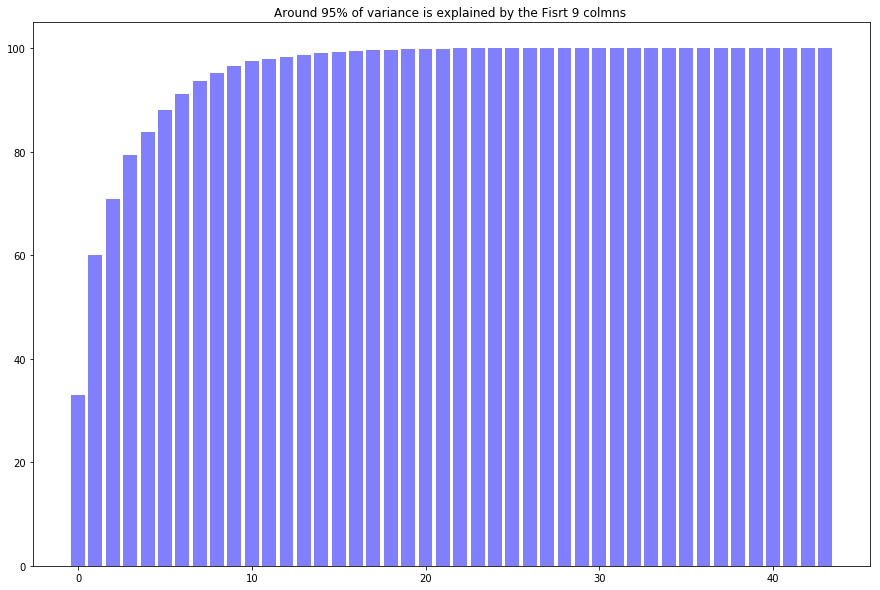

In [42]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(15,10))
plt.bar(range(44), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 95% of variance is explained by the Fisrt 9 colmns ");

In [74]:
#95% of variance is explained by 9 features
pca=sklearnPCA(0.95)
pca.fit(X)
pca.explained_variance_ratio_

array([0.32966603, 0.27036314, 0.10867115, 0.08477386, 0.04493446,
       0.0419649 , 0.03163749, 0.02474035, 0.01506677])

In [75]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,y,test_size=0.30)

In [45]:
pca_train=pca.transform(X_train)
pca_test=pca.transform(X_test)

In [46]:
from sklearn.svm import SVC

In [47]:
clf_svm = SVC(kernel='rbf', C=10, gamma=1, probability=True)
clf_svm.fit(pca_train,Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
Ypreds=clf_svm.predict(pca_test)
clf_svm.score(pca_test,Y_test)

0.8104395604395604

In [49]:
scores = cross_val_score(clf_svm, pca_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print('CV Accuracy: %.5f +/- %.4f' % (np.mean(scores), np.std(scores)))

Scores: [0.80078125 0.8046875  0.78823529 0.80314961 0.7992126  0.79133858
 0.78740157 0.79133858 0.7992126  0.80314961]
CV Accuracy: 0.79685 +/- 0.0063


In [50]:
scores = cross_val_score(clf_svm, pca_train, Y_train, cv=10, scoring = "precision_weighted")
print("Scores:", scores)
#print("Mean Precision:", scores.mean())
print('CV Precision: %.5f +/- %.4f' % (np.mean(scores), np.std(scores)))

Scores: [0.84142187 0.84390688 0.83361345 0.84283719 0.81070484 0.83539856
 0.77962205 0.83539856 0.84033773 0.8171692 ]
CV Precision: 0.82804 +/- 0.0192


In [51]:
scores = cross_val_score(clf_svm, pca_train, Y_train, cv=10, scoring = "recall_weighted")
print("Scores:", scores)
#print("Mean Precision:", scores.mean())
print('CV Recall: %.5f +/- %.4f' % (np.mean(scores), np.std(scores)))

Scores: [0.80078125 0.8046875  0.78823529 0.80314961 0.7992126  0.79133858
 0.78740157 0.79133858 0.7992126  0.80314961]
CV Recall: 0.79685 +/- 0.0063


In [52]:
scores = cross_val_score(clf_svm, pca_train, Y_train, cv=10, scoring = "f1_weighted")
print("Scores:", scores)
#print("Mean Precision:", scores.mean())
print('CV F1: %.5f +/- %.4f' % (np.mean(scores), np.std(scores)))

Scores: [0.73145929 0.73929269 0.70564706 0.73480866 0.7321832  0.70993298
 0.70761389 0.70993298 0.7267312  0.73997127]
CV F1: 0.72376 +/- 0.0132


In [53]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [64]:
from sklearn.naive_bayes import GaussianNB

In [66]:
pipe_lr = Pipeline([('slc', StandardScaler()),
                ('pca', sklearnPCA(0.95)),
                ('clf', GaussianNB())])

In [76]:
pca=sklearnPCA(9)
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.33797763, 0.25855712, 0.111229  , 0.08582679, 0.04568848,
       0.04010774, 0.03165785, 0.02437028, 0.01580367])

In [80]:
X_train2 = X_train[:, [0,8]]
cv = StratifiedKFold(Y_train, n_folds=2)
fig = plt.figure(figsize=(15,15))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr  = []

TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [57]:
pipe_svm = Pipeline([('slc', StandardScaler()),
                ('pca', sklearnPCA(0.95)),
                ('clf', SVC(kernel='rbf', C=10, gamma=1, probability=True))])

In [63]:
X_train = X_train[:, [0,2]]
cv = StratifiedKFold(Y_train,n_folds=2, random_state=1)
fig = plt.figure(figsize=(15,15))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr  = []

IndexError: index 2 is out of bounds for axis 1 with size 2

In [60]:
from sklearn.metrics import confusion_matrix

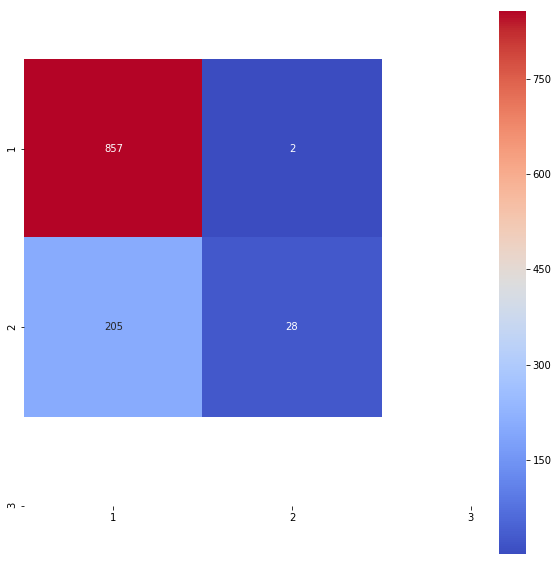

In [61]:
cm = confusion_matrix(Y_test,Ypreds)
xy=np.array([1,2,3])
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,cmap='coolwarm',xticklabels=xy,yticklabels=xy, fmt= '.0f')

In [ ]:
#90% of variance is explained by 7 features
pca=sklearnPCA(0.90)
pca.fit(X)
pca.explained_variance_ratio_